In this project, we will build a model based on Recurrent Neural Networks (RNN) and Long Short-Term Memory (LSTM) to predict the trend of the EUR/USD exchange rate. Using five years of historical data (September 13, 2019 - September 13, 2024) downloadable from investing.com.

The goal is to forecast the trend for   Aout 2024, specifically whether the EUR/USD rate will rise or fall.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Importing the training set and

In [4]:
dataset_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EUR_USD_Prediction/EUR_USD_prediction_train.csv')
training_set = dataset_train.iloc[:,1:2].values

#visualizing the results for better understanding
q = pd.DataFrame(training_set)
q

,0
0,1.0816
1,1.0821
2,1.0864
3,1.0847
4,1.0840
...,...
1268,1.1042
1269,1.1030
1270,1.1073
1271,1.1000


### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [6]:
q = pd.DataFrame(training_set_scaled)
q

,0
0,0.447128
1,0.448957
2,0.464691
3,0.458471
4,0.455909
...,...
1268,0.529821
1269,0.525430
1270,0.541164
1271,0.514453


In [7]:
# Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []
for i in range(60, 1250):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

p = pd.DataFrame(X_train)
p
q = pd.DataFrame(y_train)
q

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.4471277 ],
        [0.44895719],
        [0.46469082],
        ...,
        [0.43175997],
        [0.43468716],
        [0.42334431]],

       [[0.44895719],
        [0.46469082],
        [0.45847055],
        ...,
        [0.43468716],
        [0.42334431],
        [0.42444201]],

       [[0.46469082],
        [0.45847055],
        [0.45590926],
        ...,
        [0.42334431],
        [0.42444201],
        [0.43029638]],

       ...,

       [[0.56019027],
        [0.5532382 ],
        [0.5532382 ],
        ...,
        [0.56238566],
        [0.56019027],
        [0.56933772]],

       [[0.5532382 ],
        [0.5532382 ],
        [0.57080132],
        ...,
        [0.56019027],
        [0.56933772],
        [0.56677644]],

       [[0.5532382 ],
        [0.57080132],
        [0.58690084],
        ...,
        [0.56933772],
        [0.56677644],
        [0.56019027]]])

### Testing the model on "EUR_USD_prediction_test"

##### Building the RNN

In [8]:
# Importing the keras librairies and the keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
# Initializing the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - loss: 0.1283
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0110
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - loss: 0.0074
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0062
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - loss: 0.0060
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 0.0064
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 0.0067
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0067
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - loss: 0.0065
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0064
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - loss: 0.0051
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0058
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.0061
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - loss: 0.0048
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 

### Forecasting the trend for August

##### Making the predictions and visualizing the results

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


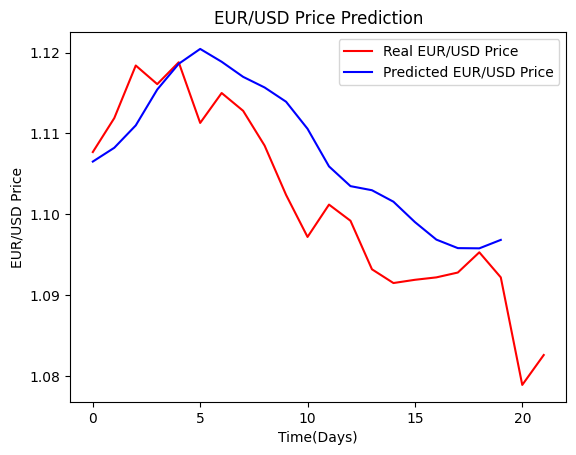

In [10]:
# Getting the real stock price of August 2024
dataset_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EUR_USD_Prediction/EUR_USD_prediction_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2024
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizing the results
plt.plot(real_stock_price, color='red', label='Real EUR/USD Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted EUR/USD Price')
plt.title('EUR/USD Price Prediction')
plt.xlabel('Time(Days)')
plt.ylabel('EUR/USD Price')
plt.legend()
plt.show()
